# Power spectrum
The total power of a function f is defined in the signal processing literature as the integral of the function squared, divided by the area of its domain. Using the orthonormality properties of the real unit-power spherical harmonic functions, it is straightforward to verify that the total power of a function defined on the unit sphere is related to its spectral coefficients by a generalization of Parseval's theorem (here, the theorem is stated for Schmidt semi-normalized harmonics, the relationship is slightly different for orthonormal harmonics):

$$
{\frac {1}{4\,\pi }}\int _{\Omega }\left|f(\Omega )\right|^{2}\,d\Omega =\sum _{\ell =0}^{\infty }S_{f\!f}(\ell ),
$$
where

$$
S_{f\!f}(\ell )={\frac {1}{2\ell +1}}\sum _{m=-\ell }^{\ell } \left|f_{\ell m} \right|^{2}
$$

(How does this pan out for the real coeffs?)

It is common that the power spectrum is well approximated by a power law of the form

$$
S_{f\!f}(\ell )=C\,\ell ^{\beta }.
$$
When β = 0, the spectrum is "white" as each degree possesses equal power. When β < 0, the spectrum is termed "red" as there is more power at the low degrees with long wavelengths than higher degrees. Finally, when β > 0, the spectrum is termed "blue". 

### Units
For the magnetic field, the unit of $S_{f\!f}$ is magnetic field strength squared. The magnetic energy density (in $\text{Jm}^{-3} = \text{Nm}^{-2} = \text{Pa}$) is given by
$$
u = \frac{B^2}{2\mu_0}
$$
Hence the average magnetic pressure at the surface (from the radial component) for each order $\ell$ of the magnetic field is
$$
\bar{P}_\text{mag}(\ell) =\frac{1}{2\mu_0}\,S_{f\!f}(\ell)
$$

### Key insight
The equation is factored into
$$
f(r, \theta, \phi) = \sum_{\ell m} f^m_\ell R_{\ell m}(r) \, \Theta_{\ell m}(\theta) \, \Phi_{\ell m}(\phi) 
$$
this is true for both real and complex formalisms. 

The stellar surface $r_\star$ and the source surface $r_\text{ss}$ are parameters to $R_{\ell m}$ only.

In the real formalism 
$$
\Phi_{\ell m}(\phi) = g_{\ell m}\cos (m\phi) + h_{\ell m} \sin(m\phi)
$$
and I think
$$
\Theta_{\ell m}(\theta) = P^m_\ell(\cos\theta))
$$
and (for $f=B_r$)
$$
R_{\ell m}(r; r_\star, r_\text{ss}) = 
\frac{
\ell + 1 + \ell \left(
\frac{r}{r_\text{ss}} \right)^{2\ell+1}}
{\ell + 1 + \ell \left(
\frac{r_\star}{r_\text{ss}} \right)^{2\ell+1}}
\left(
\frac{r_\star}{r}
\right)^{\ell+2}
$$

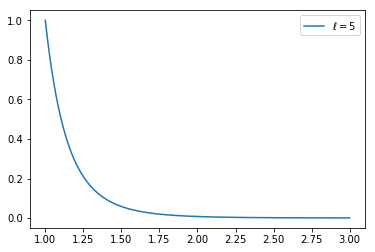

In [110]:
def Rlm(r, ell, rs, rss):
    numerator   = ell + 1 + ell *  (r/rss)**(2*ell+1)
    denominator = ell + 1 + ell * (rs/rss)**(2*ell+1)
    return (rs/r)**(ell+2) * (numerator / denominator)

rs = 1
rss = 3
r = np.linspace(rs, rss, 1000)
for ell in [5]: #[0,1,2,4, 10, 20, 40, 100]:
    plt.plot(r, Rlm(r, ell, rs, rss), label='$\ell=%d$' % ell)
plt.legend()
plt.show()

The $R_\ell$ functions increasingly drop of with increasing $r$. This suggests that the power spectrum should drop of similarly for higher $\ell$ values.

## Power spectrum as function of $r$
_Claim_ $R(r)$ is independent of formalism and normalisation. Is this true??

# Unsigned magnetic flux
The magnetic flux through as surface is given by
$$
\Phi_B(r) \equiv \oint_{S(r)} \vec B \cdot \mathrm{d} \vec S 
$$
In polar coordinates, $B = B_r \hat r +  B_\theta \hat \theta + B_\phi \hat \phi$ and the surface element normal vector $\text{d}\vec{S} \parallel \hat r$ so
$$
\Phi_B (r)= 
\oint_{S(r)} 
B_r   \mathrm{d}S \\
= \int_0^{2\pi}\int_0^\pi B_r \mathrm{d}A
= \int_0^{2\pi}\int_0^\pi B_r \, r \sin\theta \,\text{d}\theta \text{d}\phi
$$

$$
\Phi_B (r)= 
\int_0^{2\pi}\int_0^\pi 
\sum_{\ell m} R_{\ell m}(r) \, \Theta_{\ell m}(\theta) \, \Phi_{\ell m}(\phi)  \, r\sin\theta \,\text{d}\theta \text{d}\phi
$$

$$
\Phi_B (r)= \sum_{\ell m}
rR_{\ell m}(r) 
\int_0^{2\pi} \Phi_{\ell m}(\phi) 
\int_0^\pi  \, \Theta_{\ell m}(\theta)  \, \sin\theta \,\text{d}\theta \text{d}\phi
$$

changing coordinates,
$$
\Phi_B (r)= \sum_{\ell m}
rR_{\ell m}(r) 
\int_0^{2\pi} \Phi_{\ell m}(\phi) \,\text{d}\phi
\int_{-1}^{1}  \, \Theta_{\ell m}(x)   \,\text{d}x 
$$

From symmetry (except $\ell=m=0$ which we clamp to $0$), 
$$
\int_0^{2\pi} \Phi_{\ell m}(\phi) \,\text{d}\phi = 0
$$
and thus $\Phi_B(r) = 0$ which is expected for a magnetic field.

## Unsigned magnetic flux
Looking instead at the total unsigned magnetic flux
$$
\Phi_{|B|}(r) \equiv \oint_{S(r)} \left| \vec B \cdot \mathrm{d} \vec S \right| \\
$$
following the above approach,
$$
\Phi_{|B|} (r)= 
\int_0^{2\pi}\int_0^\pi 
\left|
\sum_{\ell m} r\,R_{\ell m}(r) \, \Theta_{\ell m}(\theta) \, \Phi_{\ell m}(\phi)  
\right|
\sin\theta \,\text{d}\theta \text{d}\phi
$$
which does not permit further factorisation. The unsigned magnetic flux is not a linear combination of the $\ell,m$-terms so the effect of each term cannot be studied independently.

In [5]:
from astropy import units as u
from astropy import constants as c
import numpy as np

degree_l = np.array([0, 1, 1,7])
order_m = np.array([1, 0, 1,0])
flm = np.array([2, 3, 4,6]) * u.gauss
print(flm)

print(np.where(degree_l == 0))
print(np.where(degree_l == 1))

relevant_degrees = np.unique(degree_l)
relevant_sff = np.empty_like(relevant_degrees) * u.gauss**2
for deg_id, deg in enumerate(relevant_degrees):
    schmidt = (2.0 * deg + 1.0)**(-1) 
    sff = np.sum((np.where(degree_l == deg, flm, 0) * u.gauss)**2) 
    print(deg_id, deg, sff)
    relevant_sff[deg_id] = sff

print(list(zip(relevant_degrees, relevant_sff)))
print((0.5 / c.mu0 * relevant_sff).to(u.pascal))

[2. 3. 4. 6.] G
(array([0]),)
(array([1, 2]),)
0 0 4.0 G2
1 1 25.0 G2
2 7 36.0 G2
[(0, <Quantity 4. G2>), (1, <Quantity 25. G2>), (7, <Quantity 36. G2>)]
[0.01591549 0.09947184 0.14323945] Pa


In [126]:
from scipy.special import lpmn

def real_sph_harm(polar=0, R0=1, Rs=2.6):
    #scipy.special.lpmn(m, n, z) returns upper triangular matrices.
    #Returns two arrays of size (m+1, n+1) containing Pmn(z) and Pmn'(z) for 
    #all orders from 0..m and degrees from 0..n.
    Pml, dPml = lpmn(3,3,np.cos(polar))
    
    # Set up m and l
    order_m, degree_l = np.meshgrid(np.arange(0, Pml.shape[0]), np.arange(0, Pml.shape[0]))
    print(order_m)
    print(degree_l)
    

    # https://en.wikipedia.org/wiki/Spherical_harmonics#Condon%E2%80%93Shortley_phase
    # https://en.wikipedia.org/wiki/Spherical_harmonics#Conventions
    d0 = np.where(order_m == 0, 1, 0)
    print(d0)
    cml = (-1) ** order_m * np.sqrt(
        factorial(degree_l - order_m) / factorial(degree_l + order_m)) * np.sqrt(2 - d0)

    print(cml)
    
    
    
    fixed = (R0 / r) ** (l + 2) / (l + 1 + l * (R0 / Rs) ** (2 * l + 1))

    B_radial += Pml * (g * np.cos(m * azimuth) + h * np.sin(m * azimuth)) * (
            l + 1 + l * (r / Rs) ** (2 * l + 1)) * fixed;
    B_polar -= DPml * (g * np.cos(m * azimuth) + h * np.sin(m * azimuth)) * (1 - (r / Rs) ** (2 * l + 1)) * fixed;
    B_azimuthal += Pml * (g * np.sin(m * azimuth) - h * np.cos(m * azimuth)) * (
            1 - (r / Rs) ** (2 * l + 1)) * fixed;

    return B_radial, B_polar, B_azimuthal

print(real_sph_harm())

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]
[[ 1.         -0.          0.         -0.        ]
 [ 1.         -1.          0.         -0.        ]
 [ 1.         -0.57735027  0.28867513 -0.        ]
 [ 1.         -0.40824829  0.12909944 -0.05270463]]


NameError: name 'r' is not defined

In [6]:
%reset -f
import numpy as np
from scipy.integrate import dblquad

def regular_integral(x0=0, x1=2, y0=7, y1=8):
    
    result = dblquad(lambda x,y: 1,
                     x0, x1,
                     lambda y: y0, lambda y:y1)
    
    return result

print(regular_integral())
print(regular_integral(0, np.pi, 0, 2*np.pi))

def spherical_integral(t0=0, t1=np.pi, p0=0, p1=2*np.pi):
    
    result = dblquad(lambda t,p: 1 * np.sin(p),
                    t0, t1,
                    lambda p:p0, lambda p:p1)
    
    return result

print(spherical_integral())
print(spherical_integral()[0]-4*np.pi)

from scipy.special import lpmv, factorial
import matplotlib.pyplot as plt

theta = np.linspace(0, np.pi, 400)

plt.plot(theta, np.sin(theta))

order_m = 2
degree_l = 3

plt.plot(theta, lpmv(order_m, degree_l, np.cos(theta)), 
                 label='$\ell, m=%d,%d$' % (degree_l, order_m))
plt.plot(theta, 
         np.abs(lpmv(order_m, degree_l, np.cos(theta))), 
         label='$\ell, m=%d,%d$' % (degree_l, order_m))
plt.legend()
plt.show()



(2.0, 2.220446049250313e-14)
(19.739208802178716, 2.1914924100062368e-13)


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]


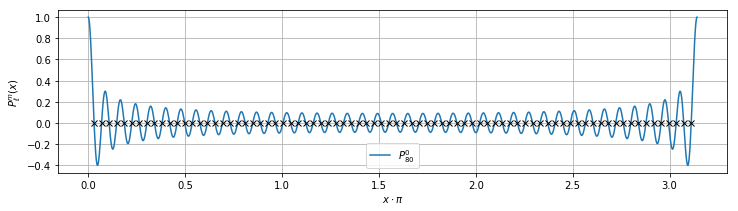

In [84]:
theta = np.linspace(0,np.pi,1000)
order_m = 0

plt.figure(figsize=(12,3))
for degree_l in [80]:
    plt.plot(theta, lpmv(order_m, degree_l, np.cos(theta)), 
                     label='$P_{%d}^{%d}$' % (degree_l, order_m))
    #plt.plot(theta, 1/11*lpmv(order_m+1, degree_l, np.cos(theta)), 
    #                 label='$P_{%d}^{%d}$' % (degree_l, order_m))
    
    #Bruns inequalities
    def bruns(degree_l):
        nu = np.arange(1,degree_l+1)
        print(nu)
        lower = (nu - .5)/(degree_l + .5)*np.pi
        upper = (nu - .0)/(degree_l + .5)*np.pi
        plt.plot(lower, 0*lower, 'x')
        plt.plot(upper, 0*upper, 'o')
        
    # Markoff and Stieltjes inequalities
    def markoff_stieltjes(degree_l):
        nu = np.arange(1, (degree_l+1)/2)
        print(nu)
        half_lower = (nu - .5)/(degree_l + 0.0) * np.pi
        half_upper = (nu - .0)/(degree_l + 1.0) * np.pi
        if degree_l % 2 == 1:
            midval = [np.pi/2]
        else:
            midval = []
        lower = np.concatenate((half_lower, midval, np.pi-half_upper))
        upper = np.concatenate((half_upper, midval, np.pi-half_lower))
        #plt.plot(lower, 0*lower, 'x')
        #plt.plot(upper, 0*upper, 'o')
        plt.plot(0.5*(lower + upper), 0*lower, 'kx')
        
    markoff_stieltjes(degree_l)
    #markoff_stieltjes(degree_l-1)
plt.legend()
plt.grid()
plt.xlabel('$x\cdot\pi $')
plt.ylabel('$P_\ell^m(x)$')
plt.show()